In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
# Combine other small categories  
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0), 'EDUCATION'] = 4

In [6]:
# Combine to have 1:married, 2:single, 3:other
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [7]:
df.rename({'PAY_0': 'pay_stat_sep', 'PAY_2': 'pay_stat_aug', 'PAY_3': 'pay_stat_jul', 'PAY_4': 'pay_stat_jun', 'PAY_5': 
           'pay_stat_may', 'PAY_6': 'pay_stat_apr', 'default.payment.next.month': 'default'}, axis=1, inplace=True)

In [8]:
for col in df.columns:
    df.rename({'{}'.format(col): '{}'.format(col.lower())}, axis=1, inplace=True)

In [9]:
df['last_month_v_limit'] = df['bill_amt1']/df['limit_bal']

In [10]:
df['last_month_v_limit'].head() 

0    0.195650
1    0.022350
2    0.324878
3    0.939800
4    0.172340
Name: last_month_v_limit, dtype: float64

In [11]:
from scipy.stats.stats import pearsonr
pearsonr(df['default'], df['last_month_v_limit'])

(0.08616810335391435, 1.5126308865122633e-50)

In [12]:
df['no_credit_used'] = np.where(df['pay_stat_sep']==-2, 1, 0)

In [13]:
df['full_payment_made'] = np.where(df['pay_stat_sep']==-1, 1, 0)

In [14]:
df['min_payment_made'] = np.where(df['pay_stat_sep']==0, 1, 0)

In [15]:
months = ['sep', 'aug', 'jul', 'jun', 'may', 'apr']
for i, c in enumerate(months):
    df[f'deferred_payment_{c}'] = np.where(df[f'pay_stat_{c}']<=0, 0, 1)
    

In [16]:
df.head(25)

,id,limit_bal,sex,education,marriage,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,last_month_v_limit,no_credit_used,full_payment_made,min_payment_made,deferred_payment_sep,deferred_payment_aug,deferred_payment_jul,deferred_payment_jun,deferred_payment_may,deferred_payment_apr
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.195650,0,0,0,1,1,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.022350,0,1,0,0,1,0,0,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,0.324878,0,0,1,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0.939800,0,0,1,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.172340,0,1,0,0,0,0,0,0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,1.288000,0,0,1,0,0,0,0,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,0.735930,0,0,1,0,0,0,0,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,0.118760,0,0,1,0,0,0,0,0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,0.080607,0,0,1,0,0,1,0,0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.000000,1,0,0,0,0,0,0,0,0


In [17]:
df.deferred_payment_sep.value_counts()

0    23182
1     6818
Name: deferred_payment_sep, dtype: int64

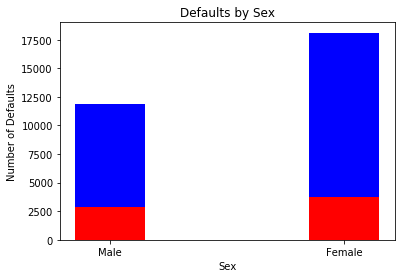

In [18]:
p1 = plt.bar(['Male', 'Female'],[df.default.loc[df['sex'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], color='r', width=0.3)
p2 = plt.bar(['Male', 'Female'],[df.default.loc[df['sex'] == 1].value_counts()[0], df.default.loc[df['sex'] == 2].value_counts()[0]], color='b', 
             bottom=[df.default.loc[df['sex'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], width=.3)
plt.title("Defaults by Sex")
plt.ylabel('Number of Defaults')
plt.xlabel('Sex')
plt.show()

In [19]:
education_df = df.groupby(['education', 'default']).size()

In [69]:
nums = []
for i in range(1,5):
    values = []
    for j in range(0,2):
        if j == 0:
            values.append(education_df[i][j]/(education_df[i][j] + education_df[i][j+1]))
        if j == 1:
            values.append(education_df[i][j]/(education_df[i][j] + education_df[i][j-1]))
    nums.append(values)  

In [75]:
edu_defaults = [x[1] for x in nums]

In [76]:
edu_defaults

[0.19234766178554558,
 0.23734853884533144,
 0.2515761643278422,
 0.07051282051282051]

In [56]:
scaley_edu.head(10)

education  default
1          0          0.284967
           1          0.067867
2          0          0.356667
           1          0.111000
3          0          0.122667
           1          0.041233
4          0          0.014500
           1          0.001100
dtype: float64

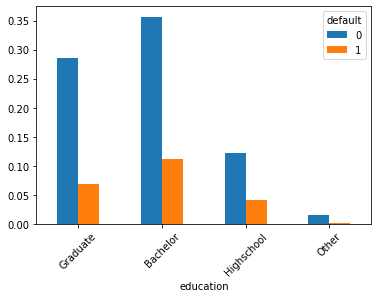

In [55]:
scaley_edu.unstack(level=1).plot(kind='bar', subplots=False,)
plt.gca()
plt.xticks(
    ticks = [0, 1, 2, 3], 
    labels=('Graduate', 'Bachelor', 'Highschool', 'Other'), 
    rotation=45
);

In [22]:
len(df['age'].value_counts())

56

In [23]:
age_df = df.copy()

In [24]:
age_df['age_bins'] = pd.qcut(age_df['age'], q=10, precision=0)

In [25]:
age_df['age_bins'].value_counts()

(20.0, 25.0]    3871
(31.0, 34.0]    3466
(43.0, 49.0]    3306
(34.0, 37.0]    3262
(27.0, 29.0]    3014
(37.0, 40.0]    2768
(25.0, 27.0]    2733
(49.0, 79.0]    2680
(29.0, 31.0]    2612
(40.0, 43.0]    2288
Name: age_bins, dtype: int64

In [26]:
grouped_age_df = age_df.groupby(['age_bins', 'default']).size()

In [90]:
grouped_age_df.index[1] == 1

False

IndexError: invalid index to scalar variable.

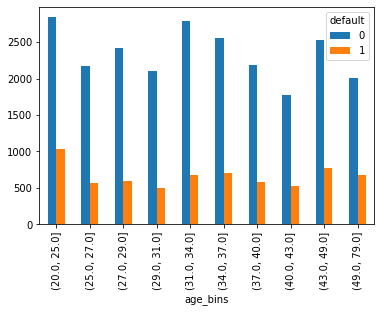

In [27]:
grouped_age_df.unstack(level=1).plot(kind='bar', subplots=False)

In [28]:
marriage_df = df.groupby(['marriage', 'default']).size()

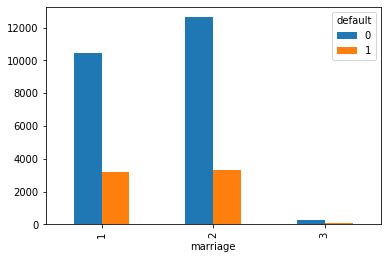

In [29]:

marriage_df.unstack(level=1).plot(kind='bar', subplots=False)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [31]:
sv_classifier = SVC(C=5000, gamma=0.03)

# parameter_grid = {'C':np.linspace(1000, 500000, 10),
#                  'gamma': np.linspace(0.1, 100, 10)}

In [32]:
X = df.drop(columns='default', axis=1)
y = df['default']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
from imblearn.over_sampling import SMOTE
smiter = SMOTE(random_state = 137)
X_train_res, y_train_res = smiter.fit_resample(X_train, y_train)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [35]:
len(X_train_res)-len(X_train)

12522

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [37]:
sv_classifier.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_hat = sv_classifier.predict(X_test.values)

In [ ]:
roc_auc_score(y_test, y_hat)

In [ ]:
print(y_test.values)

In [ ]:
dummy_df = pd.get_dummies(df[['marriage', 'sex', 'education']])
dummy_df['last_month_v_limit'] = df['last_month_v_limit']
dummy_df['limit_bal'] = df['limit_bal']

In [ ]:
X2 = dummy_df
y2 = df['default']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [ ]:
scaler2 = MinMaxScaler()

In [ ]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
sv_classifier2 = SVC(C=500, gamma='auto')

In [ ]:
sv_classifier2.fit(X2_train, y2_train)

In [ ]:
y2_hat = sv_classifier2.predict(X2_test)
roc_auc_score(y2_test, y2_hat)